## EDA(Exploratory Data Analysis ) on the Credit Data

In [1]:
import pandas as pd
import sys

In [2]:
sys.path.insert(0, '/10 A KAI 2/Week6/Credit_Scoring/')

In [3]:
from Script.EDA import Eda

In [4]:
df = pd.read_csv('../Data/data.csv')

In [5]:
EDA = Eda(df)

### Summery of the data for both numeric and object data type separatelly

In [6]:
EDA.summary()

Numeric Columns Summary:
                   count         mean            std        min    25%  \
CountryCode      95662.0   256.000000       0.000000      256.0  256.0   
Amount           95662.0  6717.846433  123306.797164 -1000000.0  -50.0   
Value            95662.0  9900.583941  123122.087776        2.0  275.0   
PricingStrategy  95662.0     2.255974       0.732924        0.0    2.0   
FraudResult      95662.0     0.002018       0.044872        0.0    0.0   

                    50%     75%        max  
CountryCode       256.0   256.0      256.0  
Amount           1000.0  2800.0  9880000.0  
Value            1000.0  5000.0  9880000.0  
PricingStrategy     2.0     2.0        4.0  
FraudResult         0.0     0.0        1.0  


Object Columns Summary:
                      count unique                   top   freq
TransactionId         95662  95662   TransactionId_35670      1
BatchId               95662  94809         BatchId_67019     28
AccountId             95662   3633        

### Data type check

In [7]:
EDA.check_datatypes()

TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object


### Check the information on each columns

In [8]:
EDA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

### Number of col and rows

In [9]:
EDA.no_col_row()

Number of rows: 95662
Number of columns: 16


### Missing values Count 

In [10]:
EDA.missing_values()

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64


### Correlation for nueric data

In [11]:
EDA.correlation_num_col()

,Amount,Value,PricingStrategy,FraudResult
Amount,1.000000,0.989692,-0.061931,0.557370
Value,0.989692,1.000000,-0.017020,0.566739
PricingStrategy,-0.061931,-0.017020,1.000000,-0.033821
FraudResult,0.557370,0.566739,-0.033821,1.000000


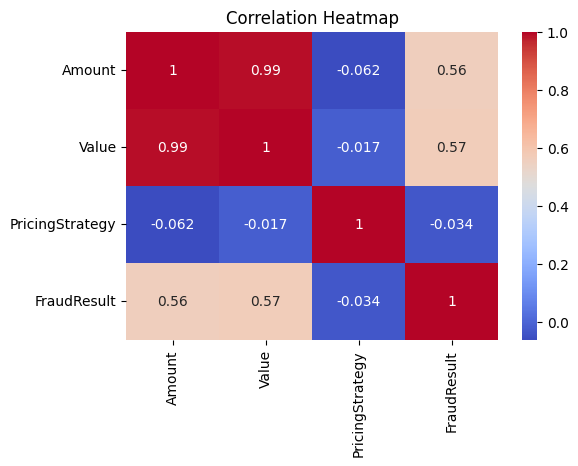

In [12]:
EDA.corr_heatmap()

### Distributions of numeric col

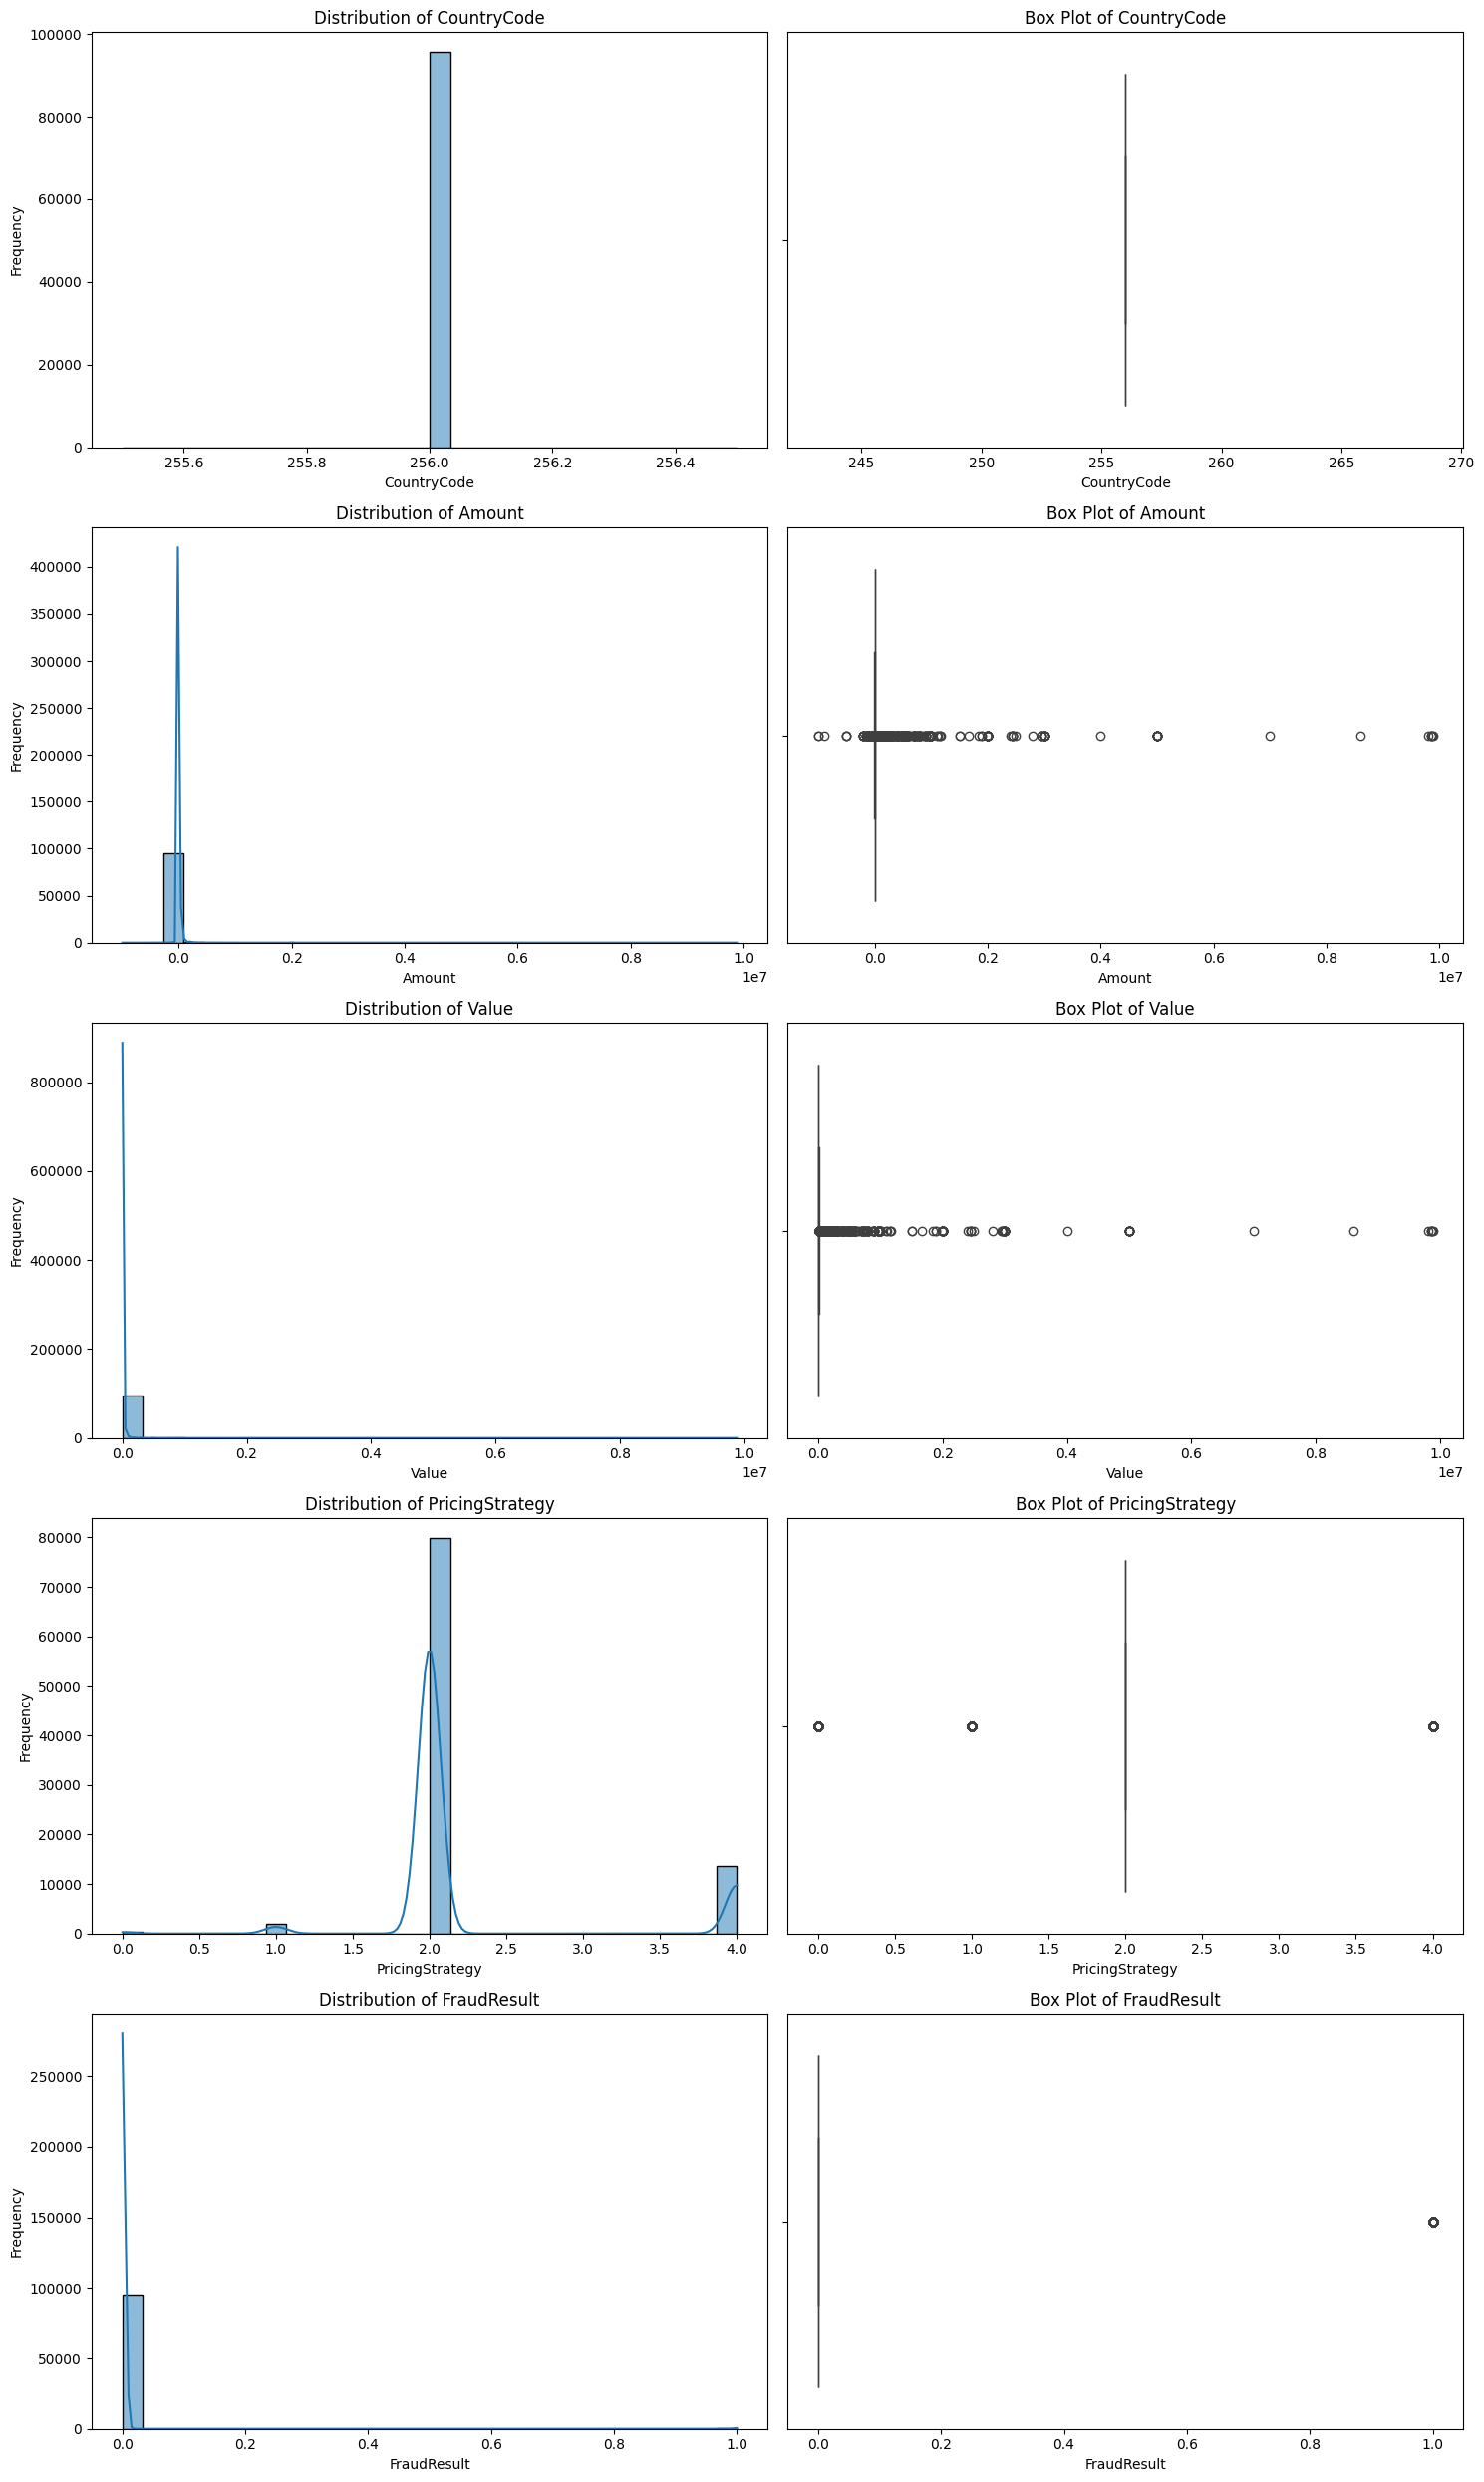

In [13]:
EDA.visualize_numerical_features()

### Overall Insights:
1. **Imbalance in Data**: The dataset appears to be highly imbalanced for several variables, particularly FraudResult, where most data points are non-fraudulent. Similarly, for CountryCode, there is very little diversity.
2. **Outliers in Amount and Value**: Both Amount and Value variables exhibit a large number of outliers, indicating some extreme transactions that might need closer examination. These outliers could represent rare but significant events (large transactions).
3. **Multimodal Pricing Strategy**: The PricingStrategy distribution suggests that different strategies are employed, but two strategies dominate the dataset.

### Distribution of catagorical col

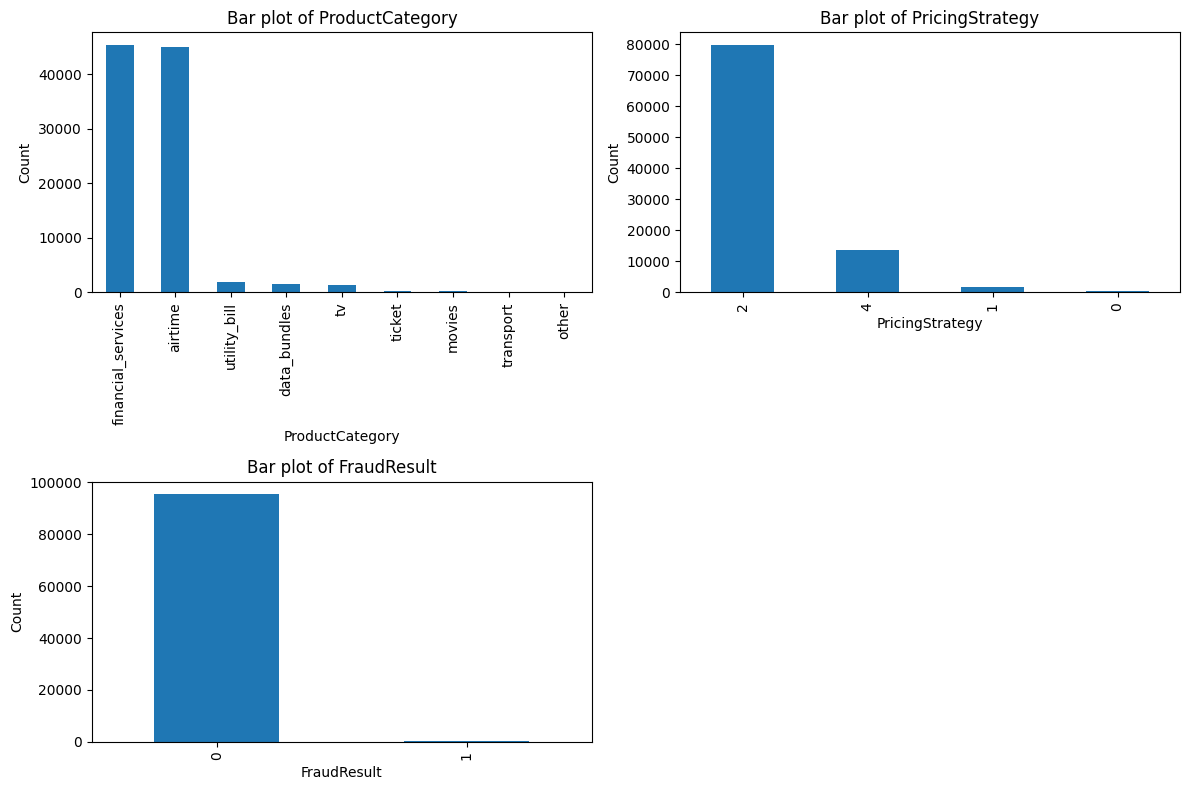

In [15]:
attributes = ['ProductCategory','PricingStrategy', 'FraudResult']
EDA.visualize_categorical_selected_features(attributes)

1. **ProductCategory**: The majority of the transactions are focused on a few key categories, with financial_services and airtime dominating the counts. Other categories like utility_bill, data_bundles, and tv are much less common in the dataset.
2. **PricingStrategy**: Most transactions are classified under PricingStrategy 2, with a smaller proportion of transactions falling under PricingStrategy 4. The rest of the strategies (0, 1, other) have significantly lower counts.
3. **FraudResult**: The vast majority of transactions are labeled as non-fraudulent (FraudResult 0), while only a small fraction is classified as fraudulent (FraudResult 1). This indicates a strong class imbalance in the dataset.

### Outlier for 'Amount', 'Value','FraudResult' using boxplot

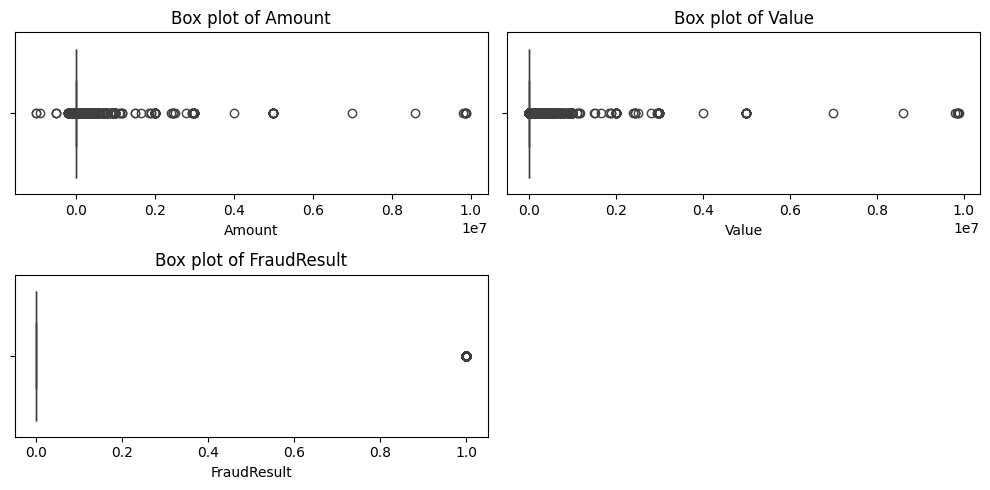

In [16]:
attributes = ['Amount', 'Value','FraudResult']
EDA.visualize_outliers_with_boxplot(attributes)

1. **Amount**: The box plot reveals numerous outliers with a right-skewed distribution, indicating that while most transactions are lower, there are significant high-value transactions.
2. **Value**: Similar to the Amount, the Value column also exhibits a right-skewed distribution with several outliers at the higher end. 
3. **FraudResult**:The box plot for FraudResult shows a heavy concentration at 0 (non-fraudulent transactions) with very few instances of fraud (1s).